Test TrainGen functions

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
% matplotlib inline
%load_ext autoreload
    
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
data = pd.read_csv('/src/Plasticity_Ker/data/kernel_training_data_auto.csv')

In [63]:
data[data['ptl_idx']==1]

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste
0,1,1,0,1,0,60,1.0,-102.898046,0.0,0,-1.322590,0.0
1,1,1,0,1,0,60,1.0,-75.579896,0.0,0,2.674768,0.0
2,1,1,0,1,0,60,1.0,-80.871473,0.0,0,-12.696449,0.0
3,1,1,0,1,0,60,1.0,-67.562239,0.0,0,0.231446,0.0
4,1,1,0,1,0,60,1.0,-63.553410,0.0,0,-0.990216,0.0
5,1,1,0,1,0,60,1.0,-64.782631,0.0,0,-6.249859,0.0
6,1,1,0,1,0,60,1.0,-43.935576,0.0,0,-12.359642,0.0
7,1,1,0,1,0,60,1.0,-24.243185,0.0,0,-7.943492,0.0
8,1,1,0,1,0,60,1.0,-24.271861,0.0,0,-14.014868,0.0
9,1,1,0,1,0,60,1.0,-15.392028,0.0,0,-3.912158,0.0


In [64]:
data['dt2'].max()

112.3534155

Test PairPtl class.

In [65]:
from modelval.pairptl import PairPtl

Test KernelGen object

In [66]:
from modelval.kernel import KernelGen

In [67]:
ker_test = KernelGen(reso_kernel=2, len_kernel = 101)

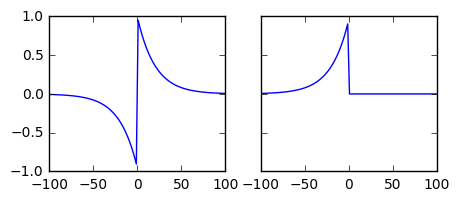

In [68]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True)
fig.set_figwidth(5)
fig.set_figheight(2)
bi_ker = ker_test.bi_exp_ker(tau_left=20, tau_right=20)
ax[0].plot(ker_test.x, bi_ker)
ax[0].set_xlim(-100, 100)
uni_ker = ker_test.uni_exp_ker(tau=20, side='left')
ax[1].plot(ker_test.x, uni_ker)

Test KernelGen function

In [69]:
from modelval.ArbDataGen import arb_spk_gen

In [70]:
test_ptl = PairPtl(*data.iloc[10])
spk_time_pre, spk_time_post, pre_spk, post_spk = arb_spk_gen(test_ptl, ker_test.reso_kernel, if_noise=1)

Protocol Bi&Poo, 1998, Fig7 (STDP), pre_spk_num=1, post_spk_num=1.00,dt =-17.84


In [71]:
spk_time_pre

array([  216,   716,  1216,  1716,  2216,  2716,  3216,  3716,  4216,
        4716,  5216,  5716,  6216,  6716,  7216,  7716,  8216,  8716,
        9216,  9716, 10216, 10716, 11216, 11716, 12216, 12716, 13216,
       13716, 14216, 14716, 15216, 15716, 16216, 16716, 17216, 17716,
       18216, 18716, 19216, 19716, 20216, 20716, 21216, 21716, 22216,
       22716, 23216, 23716, 24216, 24716, 25216, 25716, 26216, 26716,
       27216, 27716, 28216, 28716, 29216, 29716])

In [72]:
spk_time_post

array([  208,   707,  1208,  1706,  2207,  2712,  3204,  3709,  4208,
        4708,  5208,  5709,  6211,  6705,  7208,  7709,  8207,  8708,
        9204,  9706, 10208, 10709, 11208, 11709, 12207, 12709, 13208,
       13705, 14212, 14709, 15206, 15708, 16205, 16709, 17208, 17707,
       18208, 18708, 19207, 19708, 20208, 20708, 21208, 21711, 22208,
       22708, 23209, 23708, 24209, 24709, 25208, 25708, 26209, 26708,
       27207, 27708, 28208, 28713, 29207, 29708])

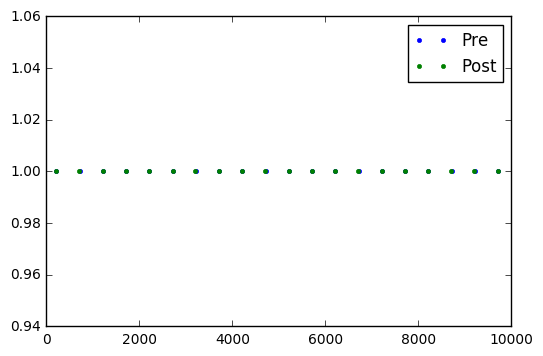

In [73]:
plt.plot(spk_time_pre[:20], np.ones(20), '.', label='Pre')
plt.plot(spk_time_post[:20], np.ones(20), '.', label='Post')
plt.legend()
#plt.axis([0,200,0.9,1.1])

Test dataset

In [74]:
from modelval.dataset import Dataset

In [75]:
x = np.random.normal(loc=0.0, scale=1.0, size=[10000,10])

In [76]:
w_true = np.ones(shape=(10,1)) * 0.5
y_true = np.dot(x, w_true)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_vali, y_train, y_vali = train_test_split(x, y_true, test_size=0.1)

In [79]:
train_data = Dataset(X_train, y_train)

In [80]:
vali_data = Dataset(X_vali, y_vali)

In [158]:
from modelval.dataset import DatasetAtflow

In [161]:
dataset = DatasetAtflow(inputs=x, targets=y_true)
train_inputs, train_targets = dataset.train_set

Test network class

In [174]:
from modelval.network import BaseNet

In [175]:
# Build the basic network
basenet = BaseNet()

In [179]:
from modelval.trainer import Trainer

In [180]:
basenet_train = Trainer(basenet.loss, inputs=basenet.X, targets=basenet.y, save_dir='/src/Plasticity_Ker/model/',  optimizer_config={'learning_rate': basenet.lr})

In [181]:
learning_rate = 0.001
iterations = 3
for i in range(iterations):
    # test_net.train(train_data, vali_data, feed_dict={lr: learning_rate, l1: 0.001, l2: 0.001})
    basenet_train.train(train_data, vali_data, feed_dict={basenet.lr: learning_rate})
    learning_rate = learning_rate/3


Initial validation cost=1195.89197
Global Step 0200 and Step 0200: validation cost=672.93707
Updated min validation loss!Saving model...
Global Step 0400 and Step 0400: validation cost=441.22623
Updated min validation loss!Saving model...
Global Step 0600 and Step 0600: validation cost=249.24222
Updated min validation loss!Saving model...
Global Step 0800 and Step 0800: validation cost=125.93304
Updated min validation loss!Saving model...
Global Step 1000 and Step 1000: validation cost=55.30396
Updated min validation loss!Saving model...
Global Step 1200 and Step 1200: validation cost=29.02476
Updated min validation loss!Saving model...
Global Step 1400 and Step 1400: validation cost=13.20674
Updated min validation loss!Saving model...
Global Step 1600 and Step 1600: validation cost=4.95751
Updated min validation loss!Saving model...
Global Step 1800 and Step 1800: validation cost=1.69992
Updated min validation loss!Saving model...
Global Step 2000 and Step 2000: validation cost=0.478

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

In [182]:
w_hat = basenet_train.evaluate(ops=basenet.w)

In [183]:
w_hat

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

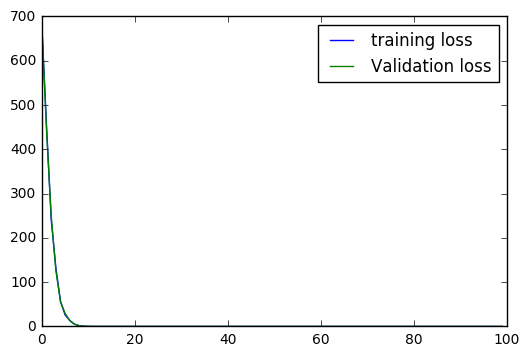

In [184]:
loss = np.vstack(basenet_train.loss_tracker)
plt.plot(loss[:,0], label = 'training loss')
plt.plot(loss[:,1], label = 'Validation loss')
plt.legend()